In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import cv2
# set the matplotlib backend so figures can be saved in the background
import matplotlib .pyplot as plt
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras import backend as K
import random
import os

# Any results you write to the current directory are saved as output.

['nonsegmentedv2']


In [3]:
data = []
labels = []

for path, _, files in os.walk('../input/nonsegmentedv2'):
    imagesPaths =  sorted([image for image in files])
    #print(imagesPaths)
    for imagePath in imagesPaths:
        image = cv2.imread('../input/nonsegmentedv2/'+ path.split('/')[3] + '/' + imagePath)
        image = cv2.resize(image, (32,32)).flatten()
        data.append(image)
        labels.append(path.split('/')[3])
        
data


[array([ 86,  97, 111, ...,  68,  85, 105], dtype=uint8),
 array([48, 69, 87, ..., 57, 77, 93], dtype=uint8),
 array([ 56,  63,  78, ...,  42,  81, 115], dtype=uint8),
 array([65, 77, 95, ..., 58, 83, 95], dtype=uint8),
 array([ 71,  92, 108, ...,  98, 112, 125], dtype=uint8),
 array([ 89,  94, 107, ...,  41,  40,  43], dtype=uint8),
 array([ 99, 127, 141, ...,  71,  74,  77], dtype=uint8),
 array([ 35,  58,  85, ..., 190, 183, 177], dtype=uint8),
 array([67, 82, 98, ..., 65, 74, 87], dtype=uint8),
 array([202, 192, 190, ...,  52,  68,  89], dtype=uint8),
 array([ 37,  47,  69, ...,  79,  90, 104], dtype=uint8),
 array([47, 57, 81, ..., 39, 54, 71], dtype=uint8),
 array([ 70,  82,  99, ...,  91, 112, 128], dtype=uint8),
 array([ 41,  55,  72, ..., 179, 173, 172], dtype=uint8),
 array([ 81, 104, 124, ...,  53,  78, 113], dtype=uint8),
 array([170, 168, 168, ...,  41,  84, 128], dtype=uint8),
 array([31, 55, 79, ..., 62, 76, 94], dtype=uint8),
 array([ 49,  59,  76, ..., 108, 141, 158], 

#### Now since , we have made the dataset and their labels, we need to do one more very common preprocessing step, that is to normalize the data , i.e. make the data points between 0 and 1 to optimize the training process and make the models learn faster.

In [4]:
data = np.array(data, dtype='float32') / 255.0
# since the pixel intensities lies from 0 to 255, thus we normalized the data to 0 to 1
labels = np.array(labels)

In [5]:
data

array([[0.3372549 , 0.38039216, 0.43529412, ..., 0.26666668, 0.33333334,
        0.4117647 ],
       [0.1882353 , 0.27058825, 0.34117648, ..., 0.22352941, 0.3019608 ,
        0.3647059 ],
       [0.21960784, 0.24705882, 0.30588236, ..., 0.16470589, 0.31764707,
        0.4509804 ],
       ...,
       [0.2627451 , 0.29803923, 0.3529412 , ..., 0.10588235, 0.17254902,
        0.29803923],
       [0.5137255 , 0.52156866, 0.5176471 , ..., 0.19215687, 0.18431373,
        0.21176471],
       [0.15294118, 0.14509805, 0.16862746, ..., 0.30588236, 0.36078432,
        0.42352942]], dtype=float32)

In [6]:
data.shape

(5539, 3072)

In [7]:
labels.shape

(5539,)

#### here we can see that there are 5539 images and 5539 labels.

In [8]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [9]:
## Here We are just doing the one-hot encoding for the labels.
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
trainY.shape

(4154, 12)

In [11]:
trainY

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# First making a toy model.


In [12]:
model = Sequential()
# First hidden layer , with 1024 nodes and the input shape would be 3072 ,
# since we have made the images into 32x32 shape.
# thus 32x32x3 = 3072 since the images have 3 colour channels , RGB.
# So there are 5539 images each image with 3072 columns or dimentions.
model.add(Dense(1024, input_shape=(3072,), activation = 'sigmoid'))
# the second hidden layer will have 512 nodes
model.add(Dense(512, activation='sigmoid'))
# Now since there are 12 classes, thus , the number of output nodes needs to be the number of classes i.e. 12
model.add(Dense(len(lb.classes_), activation="softmax"))

In [13]:
INIT_LR = 0.01
EPOCHS = 501
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss 
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [14]:
h = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size = 32)

Train on 4154 samples, validate on 1385 samples
Epoch 1/501
4154/4154 [==============================] - 2s 449us/step - loss: 2.4344 - acc: 0.1312 - val_loss: 2.4304 - val_acc: 0.0968
Epoch 2/501
4154/4154 [==============================] - 1s 198us/step - loss: 2.4270 - acc: 0.1312 - val_loss: 2.4320 - val_acc: 0.1394
Epoch 3/501
4154/4154 [==============================] - 1s 199us/step - loss: 2.4280 - acc: 0.1348 - val_loss: 2.4287 - val_acc: 0.1271
Epoch 4/501
4154/4154 [==============================] - 1s 198us/step - loss: 2.4214 - acc: 0.1343 - val_loss: 2.4300 - val_acc: 0.1271
Epoch 5/501
4154/4154 [==============================] - 1s 199us/step - loss: 2.4202 - acc: 0.1353 - val_loss: 2.4405 - val_acc: 0.0881
Epoch 6/501
4154/4154 [==============================] - 1s 196us/step - loss: 2.4220 - acc: 0.1358 - val_loss: 2.4219 - val_acc: 0.1610
Epoch 7/501
4154/4154 [==============================] - 1s 195us/step - loss: 2.4197 - acc: 0.1358 - val_loss: 2.4232 - val_acc: 

4154/4154 [==============================] - 1s 193us/step - loss: 2.2575 - acc: 0.2403 - val_loss: 2.2907 - val_acc: 0.2181
Epoch 61/501
4154/4154 [==============================] - 1s 195us/step - loss: 2.2535 - acc: 0.2412 - val_loss: 2.2976 - val_acc: 0.2007
Epoch 62/501
4154/4154 [==============================] - 1s 196us/step - loss: 2.2470 - acc: 0.2383 - val_loss: 2.2967 - val_acc: 0.2332
Epoch 63/501
4154/4154 [==============================] - 1s 195us/step - loss: 2.2414 - acc: 0.2496 - val_loss: 2.2806 - val_acc: 0.2043
Epoch 64/501
4154/4154 [==============================] - 1s 196us/step - loss: 2.2336 - acc: 0.2460 - val_loss: 2.2758 - val_acc: 0.1704
Epoch 65/501
4154/4154 [==============================] - 1s 201us/step - loss: 2.2252 - acc: 0.2468 - val_loss: 2.2632 - val_acc: 0.2144
Epoch 66/501
4154/4154 [==============================] - 1s 197us/step - loss: 2.2177 - acc: 0.2554 - val_loss: 2.2658 - val_acc: 0.2332
Epoch 67/501
4154/4154 [=======================

4154/4154 [==============================] - 1s 195us/step - loss: 1.7829 - acc: 0.3808 - val_loss: 1.8637 - val_acc: 0.3451
Epoch 120/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.7749 - acc: 0.3936 - val_loss: 1.8876 - val_acc: 0.3112
Epoch 121/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.7681 - acc: 0.3905 - val_loss: 1.8453 - val_acc: 0.3401
Epoch 122/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.7612 - acc: 0.4006 - val_loss: 1.8471 - val_acc: 0.3292
Epoch 123/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.7562 - acc: 0.3984 - val_loss: 1.8336 - val_acc: 0.3430
Epoch 124/501
4154/4154 [==============================] - 1s 196us/step - loss: 1.7466 - acc: 0.3907 - val_loss: 1.8318 - val_acc: 0.3329
Epoch 125/501
4154/4154 [==============================] - 1s 193us/step - loss: 1.7436 - acc: 0.4027 - val_loss: 1.8270 - val_acc: 0.3661
Epoch 126/501
4154/4154 [================

4154/4154 [==============================] - 1s 194us/step - loss: 1.4576 - acc: 0.4935 - val_loss: 1.6357 - val_acc: 0.3899
Epoch 179/501
4154/4154 [==============================] - 1s 197us/step - loss: 1.4515 - acc: 0.4971 - val_loss: 1.5963 - val_acc: 0.4217
Epoch 180/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.4485 - acc: 0.4993 - val_loss: 1.5981 - val_acc: 0.4181
Epoch 181/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.4438 - acc: 0.4986 - val_loss: 1.6002 - val_acc: 0.4116
Epoch 182/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.4440 - acc: 0.4966 - val_loss: 1.5901 - val_acc: 0.4043
Epoch 183/501
4154/4154 [==============================] - 1s 196us/step - loss: 1.4369 - acc: 0.4957 - val_loss: 1.5989 - val_acc: 0.4181
Epoch 184/501
4154/4154 [==============================] - 1s 194us/step - loss: 1.4325 - acc: 0.5010 - val_loss: 1.6112 - val_acc: 0.4274
Epoch 185/501
4154/4154 [================

4154/4154 [==============================] - 1s 194us/step - loss: 1.2358 - acc: 0.5657 - val_loss: 1.5173 - val_acc: 0.4758
Epoch 238/501
4154/4154 [==============================] - 1s 194us/step - loss: 1.2354 - acc: 0.5650 - val_loss: 1.4831 - val_acc: 0.4505
Epoch 239/501
4154/4154 [==============================] - 1s 198us/step - loss: 1.2293 - acc: 0.5761 - val_loss: 1.5766 - val_acc: 0.4217
Epoch 240/501
4154/4154 [==============================] - 1s 196us/step - loss: 1.2279 - acc: 0.5705 - val_loss: 1.4823 - val_acc: 0.4549
Epoch 241/501
4154/4154 [==============================] - 1s 197us/step - loss: 1.2272 - acc: 0.5684 - val_loss: 1.4878 - val_acc: 0.4585
Epoch 242/501
4154/4154 [==============================] - 1s 194us/step - loss: 1.2212 - acc: 0.5794 - val_loss: 1.4818 - val_acc: 0.4592
Epoch 243/501
4154/4154 [==============================] - 1s 202us/step - loss: 1.2213 - acc: 0.5715 - val_loss: 1.4801 - val_acc: 0.4563
Epoch 244/501
4154/4154 [================

4154/4154 [==============================] - 1s 195us/step - loss: 1.0673 - acc: 0.6336 - val_loss: 1.4522 - val_acc: 0.5004
Epoch 297/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.0677 - acc: 0.6387 - val_loss: 1.4898 - val_acc: 0.4823
Epoch 298/501
4154/4154 [==============================] - 1s 195us/step - loss: 1.0636 - acc: 0.6418 - val_loss: 1.4685 - val_acc: 0.4895
Epoch 299/501
4154/4154 [==============================] - 1s 196us/step - loss: 1.0562 - acc: 0.6444 - val_loss: 1.5454 - val_acc: 0.4448
Epoch 300/501
4154/4154 [==============================] - 1s 196us/step - loss: 1.0613 - acc: 0.6377 - val_loss: 1.4722 - val_acc: 0.4924
Epoch 301/501
4154/4154 [==============================] - 1s 197us/step - loss: 1.0595 - acc: 0.6418 - val_loss: 1.4908 - val_acc: 0.4809
Epoch 302/501
4154/4154 [==============================] - 1s 197us/step - loss: 1.0503 - acc: 0.6529 - val_loss: 1.4393 - val_acc: 0.4845
Epoch 303/501
4154/4154 [================

4154/4154 [==============================] - 1s 195us/step - loss: 0.9234 - acc: 0.6919 - val_loss: 1.4696 - val_acc: 0.5090
Epoch 356/501
4154/4154 [==============================] - 1s 195us/step - loss: 0.9260 - acc: 0.7029 - val_loss: 1.4889 - val_acc: 0.5069
Epoch 357/501
4154/4154 [==============================] - 1s 193us/step - loss: 0.9225 - acc: 0.6957 - val_loss: 1.4385 - val_acc: 0.5148
Epoch 358/501
4154/4154 [==============================] - 1s 196us/step - loss: 0.9248 - acc: 0.6928 - val_loss: 1.4597 - val_acc: 0.5054
Epoch 359/501
4154/4154 [==============================] - 1s 194us/step - loss: 0.9197 - acc: 0.7039 - val_loss: 1.4458 - val_acc: 0.5054
Epoch 360/501
4154/4154 [==============================] - 1s 201us/step - loss: 0.9168 - acc: 0.7022 - val_loss: 1.4622 - val_acc: 0.5134
Epoch 361/501
4154/4154 [==============================] - 1s 196us/step - loss: 0.9172 - acc: 0.6962 - val_loss: 1.4409 - val_acc: 0.4975
Epoch 362/501
4154/4154 [================

4154/4154 [==============================] - 1s 196us/step - loss: 0.8084 - acc: 0.7403 - val_loss: 1.4995 - val_acc: 0.5054
Epoch 415/501
4154/4154 [==============================] - 1s 194us/step - loss: 0.8100 - acc: 0.7448 - val_loss: 1.4977 - val_acc: 0.5054
Epoch 416/501
4154/4154 [==============================] - 1s 198us/step - loss: 0.8099 - acc: 0.7419 - val_loss: 1.4837 - val_acc: 0.5199
Epoch 417/501
4154/4154 [==============================] - 1s 197us/step - loss: 0.8057 - acc: 0.7455 - val_loss: 1.4790 - val_acc: 0.5199
Epoch 418/501
4154/4154 [==============================] - 1s 195us/step - loss: 0.7990 - acc: 0.7504 - val_loss: 1.5148 - val_acc: 0.4975
Epoch 419/501
4154/4154 [==============================] - 1s 202us/step - loss: 0.8024 - acc: 0.7475 - val_loss: 1.4906 - val_acc: 0.5177
Epoch 420/501
4154/4154 [==============================] - 1s 201us/step - loss: 0.7934 - acc: 0.7487 - val_loss: 1.4909 - val_acc: 0.5105
Epoch 421/501
4154/4154 [================

4154/4154 [==============================] - 1s 194us/step - loss: 0.7042 - acc: 0.7800 - val_loss: 1.6184 - val_acc: 0.4939
Epoch 474/501
4154/4154 [==============================] - 1s 195us/step - loss: 0.6978 - acc: 0.7831 - val_loss: 1.5389 - val_acc: 0.5112
Epoch 475/501
4154/4154 [==============================] - 1s 194us/step - loss: 0.6991 - acc: 0.7826 - val_loss: 1.5438 - val_acc: 0.5126
Epoch 476/501
4154/4154 [==============================] - 1s 192us/step - loss: 0.7003 - acc: 0.7841 - val_loss: 1.5729 - val_acc: 0.5061
Epoch 477/501
4154/4154 [==============================] - 1s 194us/step - loss: 0.6961 - acc: 0.7819 - val_loss: 1.5223 - val_acc: 0.5155
Epoch 478/501
4154/4154 [==============================] - 1s 194us/step - loss: 0.6927 - acc: 0.7850 - val_loss: 1.5357 - val_acc: 0.5162
Epoch 479/501
4154/4154 [==============================] - 1s 193us/step - loss: 0.6929 - acc: 0.7908 - val_loss: 1.5894 - val_acc: 0.5061
Epoch 480/501
4154/4154 [================

## Here without using any CNN or any complicated model structure , we saw that, the model produces a 50% accuracy, which is descent for this type of model.

[INFO] evaluating network...
                           precision    recall  f1-score   support

              Black-grass       0.28      0.29      0.29        72
                 Charlock       0.65      0.71      0.68       106
                 Cleavers       0.63      0.49      0.55        79
         Common Chickweed       0.45      0.72      0.55       190
             Common wheat       0.27      0.09      0.13        67
                  Fat Hen       0.45      0.40      0.43       151
         Loose Silky-bent       0.53      0.52      0.52       176
                    Maize       0.65      0.41      0.50        76
        Scentless Mayweed       0.50      0.39      0.44       152
         Shepherd’s Purse       0.51      0.42      0.46        67
Small-flowered Cranesbill       0.71      0.69      0.70       134
               Sugar beet       0.32      0.41      0.36       115

                micro avg       0.50      0.50      0.50      1385
                macro avg      

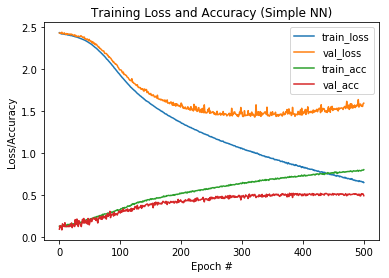

In [15]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["acc"], label="train_acc")
plt.plot(N, h.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [16]:
image = cv2.imread('../input/nonsegmentedv2/Maize/1.png')
output = image.copy()
image = cv2.resize(image, (32,32))
image = image.astype('float') / 255
image = image.flatten()
image = image.reshape((1, image.shape[0]))
image.shape

(1, 3072)

In [17]:
preds = model.predict(image)
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]
print(preds, label)

[[1.3442568e-09 4.9521925e-04 3.7400387e-05 3.4356201e-01 1.0232309e-06
  4.1861783e-04 2.7475547e-10 5.7527393e-01 4.8484888e-02 2.6156032e-02
  1.8871131e-05 5.5519738e-03]] Maize


#### As we can see that the model produces the right result for the image , which is maize. But still using a Simple feedforward neural network might not be the ideal solution, thus we are going to use CNN, VGGNet architechture  to be precise.

In [28]:
class SmallVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        
        # If the we are using 'channels first', then we need to update the input shape
        # and channels dimentions
        if K.image_data_format() == 'channels_first':
            inputShape = (depth, height, width)
            chanDim = 1
            
        model.add(Conv2D(32, (3,3), padding = 'same' ,input_shape = inputShape))
        model.add(Activation('relu'))
        ## To normalize the data along the channel dimention, to reduce training time and stabilize
        ## the network.
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 3 => POOL layer set
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [33]:
data = []
labels = []

for path, _, files in os.walk('../input/nonsegmentedv2'):
    imagesPaths =  sorted([image for image in files])
    #print(imagesPaths)
    for imagePath in imagesPaths:
        image = cv2.imread('../input/nonsegmentedv2/'+ path.split('/')[3] + '/' + imagePath)
        image = cv2.resize(image, (64,64))
        data.append(image)
        labels.append(path.split('/')[3])
        
data

[array([[[ 83,  93, 109],
         [ 80,  89, 104],
         [ 75,  84,  96],
         ...,
         [ 31,  55,  69],
         [ 34,  59,  70],
         [ 28,  54,  63]],
 
        [[ 78,  91, 106],
         [ 88,  98, 108],
         [ 87,  94, 105],
         ...,
         [ 35,  69,  84],
         [ 36,  69,  82],
         [ 39,  71,  78]],
 
        [[ 75,  90, 104],
         [ 88, 102, 110],
         [ 90, 100, 108],
         ...,
         [ 34,  72,  87],
         [ 46,  78,  89],
         [ 51,  81,  89]],
 
        ...,
 
        [[ 67,  71,  80],
         [ 73,  78,  86],
         [ 85,  93, 100],
         ...,
         [ 68,  90, 108],
         [ 70,  95, 114],
         [ 84, 108, 126]],
 
        [[ 70,  75,  87],
         [ 68,  74,  85],
         [ 68,  75,  88],
         ...,
         [ 81, 101, 115],
         [ 81, 100, 116],
         [ 69,  88, 108]],
 
        [[ 34,  45,  65],
         [ 31,  39,  60],
         [ 41,  49,  68],
         ...,
         [ 83, 101, 117],
  

In [34]:
data = np.array(data, dtype='float32') / 255.0
# since the pixel intensities lies from 0 to 255, thus we normalized the data to 0 to 1
labels = np.array(labels)

In [35]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [36]:
## Here We are just doing the one-hot encoding for the labels.
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [37]:
# construct the image generator for data augmentation
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, fill_mode="nearest")
 
"""
Image augmentation allows us to construct “additional” training data from our existing training data by randomly rotating, shifting, shearing, zooming, and flipping.

Data augmentation is often a critical step to:

1) Avoiding overfitting
2) Ensuring your model generalizes well
"""
    
# initialize our VGG-like Convolutional Neural Network
model = SmallVGGNet.build(width=64, height=64, depth=3,classes=len(lb.classes_))

In [38]:
# initialize our initial learning rate, # of epochs to train for,
# and batch size
INIT_LR = 0.01
EPOCHS = 100
BS = 32
# initialize the model and optimizer 
print("[INFO] training network...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

# train the network
h = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                                validation_data=(testX, testY), 
                                steps_per_epoch=len(trainX) // BS,
                                epochs=EPOCHS)

[INFO] training network...
Epoch 1/100
129/129 [==============================] - 11s 85ms/step - loss: 2.3556 - acc: 0.3410 - val_loss: 4.6069 - val_acc: 0.2094
Epoch 2/100
129/129 [==============================] - 8s 62ms/step - loss: 1.5818 - acc: 0.5132 - val_loss: 6.9920 - val_acc: 0.1502
Epoch 3/100
129/129 [==============================] - 8s 62ms/step - loss: 1.2741 - acc: 0.5987 - val_loss: 1.8740 - val_acc: 0.5141
Epoch 4/100
129/129 [==============================] - 8s 62ms/step - loss: 1.0909 - acc: 0.6472 - val_loss: 2.1300 - val_acc: 0.4787
Epoch 5/100
129/129 [==============================] - 8s 62ms/step - loss: 0.9964 - acc: 0.6755 - val_loss: 1.2870 - val_acc: 0.6332
Epoch 6/100
129/129 [==============================] - 8s 62ms/step - loss: 0.8742 - acc: 0.7135 - val_loss: 0.6143 - val_acc: 0.8029
Epoch 7/100
129/129 [==============================] - 8s 63ms/step - loss: 0.8237 - acc: 0.7249 - val_loss: 1.0586 - val_acc: 0.6245
Epoch 8/100
129/129 [=============

129/129 [==============================] - 8s 63ms/step - loss: 0.2639 - acc: 0.9047 - val_loss: 0.3295 - val_acc: 0.8975
Epoch 62/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2480 - acc: 0.9077 - val_loss: 0.2779 - val_acc: 0.9054
Epoch 63/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2565 - acc: 0.9031 - val_loss: 0.2893 - val_acc: 0.9054
Epoch 64/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2662 - acc: 0.9081 - val_loss: 2.1202 - val_acc: 0.6383
Epoch 65/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2561 - acc: 0.9035 - val_loss: 0.5065 - val_acc: 0.8440
Epoch 66/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2603 - acc: 0.9070 - val_loss: 0.3490 - val_acc: 0.8852
Epoch 67/100
129/129 [==============================] - 8s 62ms/step - loss: 0.2516 - acc: 0.9061 - val_loss: 0.2030 - val_acc: 0.9401
Epoch 68/100
129/129 [==============================] - 8s 62ms/step

#### As we can see here , we got a 82% accuracy by using a CNN Model .


[INFO] evaluating network...
                           precision    recall  f1-score   support

              Black-grass       0.58      0.64      0.61        72
                 Charlock       0.86      0.95      0.90       106
                 Cleavers       1.00      0.81      0.90        79
         Common Chickweed       0.93      0.92      0.92       190
             Common wheat       0.93      0.78      0.85        67
                  Fat Hen       0.95      0.81      0.87       151
         Loose Silky-bent       0.90      0.76      0.82       176
                    Maize       0.54      0.99      0.70        76
        Scentless Mayweed       0.90      0.68      0.77       152
         Shepherd’s Purse       1.00      0.67      0.80        67
Small-flowered Cranesbill       0.95      0.93      0.94       134
               Sugar beet       0.57      0.87      0.69       115

                micro avg       0.82      0.82      0.82      1385
                macro avg      

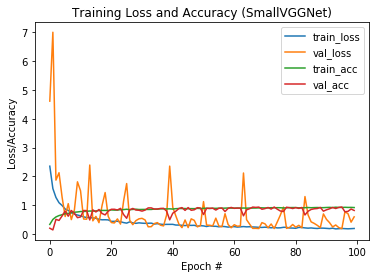

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history["acc"], label="train_acc")
plt.plot(N, h.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()